In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ptl
import seaborn as sns
from urllib.request import urlopen
from bs4 import BeautifulSoup as soup
import requests

In [ ]:
url="https://www.animalgenome.org/cgi-bin/QTLdb/OA/traitmap?trait_ID=3039"
uclient=urlopen(url)
pagehtml=uclient.read()
uclient.close()
print(pagehtml)

b'<HTML>\n<HEAD><TITLE>Sheep QTL Database</title>\n<STYLE TYPE="text/css"><!--\nP { font-size:9pt;\n    color:navy;\n    font-family:sans-serif,arial,verdana,helvetica; }\nINPUT  { font-size:8pt;\n         color:navy;\n\t font-family:sans-serif,arial,verdana,helvetica; }\n-->\n</STYLE>\n</HEAD>\n\n<BODY bgcolor="#FfFffF" text="#0000A0" link="#0000FF" vlink="#0069E1" alink="008840">\n<TABLE border=0 cellspacing=0 cellpadding=0 width=800 BACKGROUND="/QTLdb/images/titlebar_bg.jpg">\n <TR><TD align=left style="padding:2px;"><a href="/QTLdb/sheep"><img src="/QTLdb/images/sheepQTLdbsm.gif"></a>\n \n </TD><TD align=\'right\' style=\'padding:0 6px\'>\n \n <FORM NAME=highlight style="margin:0px;">\n <TABLE border=0 cellspacing=2 cellpadding=0 align=right><TR>\n <TD onmouseover="this.style.background=\'yellow\'" onmouseout="this.style.background=\'\'">\n <INPUT TYPE="button" VALUE="Browse" onClick="location.href=\'browse\'">\n </TD><TD onmouseover="this.style.background=\'yellow\'" onmouseout="t

In [ ]:
urls=[]
pagesoup=soup(pagehtml, "html.parser")
c=pagesoup.findAll("area",{"shape":"rect"})
for i in range(0,110):
    if c[i]["href"][0:8]=="qdetails":
        urls.append("https://www.animalgenome.org/cgi-bin/QTLdb/OA/"+c[i]["href"])

In [ ]:
urls

['https://www.animalgenome.org/cgi-bin/QTLdb/OA/qdetails?QTL_ID=13827',
 'https://www.animalgenome.org/cgi-bin/QTLdb/OA/qdetails?QTL_ID=13830',
 'https://www.animalgenome.org/cgi-bin/QTLdb/OA/qdetails?QTL_ID=13832',
 'https://www.animalgenome.org/cgi-bin/QTLdb/OA/qdetails?QTL_ID=57709',
 'https://www.animalgenome.org/cgi-bin/QTLdb/OA/qdetails?QTL_ID=13992',
 'https://www.animalgenome.org/cgi-bin/QTLdb/OA/qdetails?QTL_ID=14147',
 'https://www.animalgenome.org/cgi-bin/QTLdb/OA/qdetails?QTL_ID=57681',
 'https://www.animalgenome.org/cgi-bin/QTLdb/OA/qdetails?QTL_ID=57684',
 'https://www.animalgenome.org/cgi-bin/QTLdb/OA/qdetails?QTL_ID=57718',
 'https://www.animalgenome.org/cgi-bin/QTLdb/OA/qdetails?QTL_ID=13996',
 'https://www.animalgenome.org/cgi-bin/QTLdb/OA/qdetails?QTL_ID=57740',
 'https://www.animalgenome.org/cgi-bin/QTLdb/OA/qdetails?QTL_ID=193115',
 'https://www.animalgenome.org/cgi-bin/QTLdb/OA/qdetails?QTL_ID=13672',
 'https://www.animalgenome.org/cgi-bin/QTLdb/OA/qdetails?QTL_ID

In [ ]:
len(urls)

56

In [ ]:
QTL_ID=[]
CHROMOSOME=[]
CENTER_CM=[]
RANGE_CM=[]
RANGE_MBP=[]
SIGNIFICANCE=[]
PUBLICATION=[]
DOI=[]
RACE=[]
PAIS =[]
GENE_ASOCIATE=[]


for i in urls:
    url=str(i)
    uclient=urlopen(url)
    pagehtml=uclient.read()
    uclient.close()
    pagesoup=soup(pagehtml, "html.parser")
    
    qtl_id=pagesoup.find("td",{"colspan":"2"}).h2.text[4:11]
    
    table=pagesoup.find("table",{"bordercolor":"#F5F5cC"})
    table2=pagesoup.find("table",{"bordercolor":"#feddfe"})
    table3=pagesoup.find("table",{"bordercolor":"#E8e8Ff"})
    
    ranges=table.findAll("td")[5].text
    
    for i in range(0,len(ranges)):
        if ranges[i:i+4]=="(cM)":
            RANGE_CM.append(ranges[0:i+4])
            RANGE_MBP.append(ranges[i+4:len(ranges)])
            
    a=table3.findAll("tr")[2].findAll("td")[1].text.split()
    
    
    QTL_ID.append(qtl_id)
    CHROMOSOME.append(table.findAll("td")[1].text)
    CENTER_CM.append(table.find("td",{"width":"120"}).text)
    SIGNIFICANCE.append(table.findAll("td")[26].text)
    RACE.append(table2.findAll("tr")[2].div.a.text)
    PAIS.append(a[len(a)-1])
    GENE_ASOCIATE.append(table.findAll("tr")[17].findAll("td")[1].text)
    
    

In [ ]:
QTL_ID

['#13827 ',
 '#13830 ',
 '#13832 ',
 '#57709 ',
 '#13992 ',
 '#14147 ',
 '#57681 ',
 '#57684 ',
 '#57718 ',
 '#13996 ',
 '#57740 ',
 '#193115',
 '#13672 ',
 '#13818 ',
 '#13820 ',
 '#14246 ',
 '#170586',
 '#57745 ',
 '#13985 ',
 '#16017 ',
 '#37589 ',
 '#37592 ',
 '#14148 ',
 '#57690 ',
 '#57749 ',
 '#170593',
 '#170594',
 '#170597',
 '#170598',
 '#14190 ',
 '#170601',
 '#170602',
 '#170604',
 '#170605',
 '#14186 ',
 '#57696 ',
 '#57730 ',
 '#57752 ',
 '#170609',
 '#57756 ',
 '#14149 ',
 '#14150 ',
 '#14192 ',
 '#14193 ',
 '#57732 ',
 '#170613',
 '#170616',
 '#14006 ',
 '#14151 ',
 '#193118',
 '#170221',
 '#57763 ',
 '#13906 ',
 '#14008 ',
 '#14152 ',
 '#170222']

In [ ]:
CHROMOSOME

['1',
 '1',
 '1',
 '1',
 '2',
 '2',
 '2',
 '2',
 '2',
 '3',
 '3',
 '4',
 '6',
 '6',
 '6',
 '6',
 '6',
 '7',
 '9',
 '11',
 '11',
 '11',
 '12',
 '12',
 '13',
 '13',
 '13',
 '13',
 '13',
 '14',
 '14',
 '14',
 '14',
 '14',
 '15',
 '16',
 '16',
 '16',
 '16',
 '17',
 '18',
 '18',
 '18',
 '18',
 '19',
 '19',
 '19',
 '20',
 '20',
 '20',
 '21',
 '22',
 '23',
 '24',
 '24',
 '26']

In [ ]:
CENTER_CM

['96.42 (cM)',
 '128.2 (cM)',
 '124.3 (cM)',
 '0.00 (cM)',
 '206 (cM)',
 '238.81 (cM)',
 '0.00 (cM)',
 '0.00 (cM)',
 '68.17 (cM)',
 '88.2 (cM)',
 '130.96 (cM)',
 '114.67 (cM)',
 '119.8 (cM)',
 '59 (cM)',
 '59 (cM)',
 '49.9 (cM)',
 '0.00 (cM)',
 '60.46 (cM)',
 '16.6 (cM)',
 '33 (cM)',
 '0.00 (cM)',
 '0.00 (cM)',
 '37.73 (cM)',
 '0.00 (cM)',
 '20.25 (cM)',
 '0.00 (cM)',
 '0.00 (cM)',
 '0.00 (cM)',
 '0.00 (cM)',
 '57.9 (cM)',
 '0.00 (cM)',
 '0.00 (cM)',
 '0.00 (cM)',
 '0.00 (cM)',
 '73.5 (cM)',
 '0.00 (cM)',
 '13.53 (cM)',
 '14.13 (cM)',
 '0.00 (cM)',
 '52.31 (cM)',
 '40.88 (cM)',
 '40.88 (cM)',
 '91.7 (cM)',
 '91.7 (cM)',
 '57.44 (cM)',
 '0.00 (cM)',
 '0.00 (cM)',
 '36.8 (cM)',
 '39.82 (cM)',
 '66.88 (cM)',
 '43.59 (cM)',
 '10.68 (cM)',
 '68.97 (cM)',
 '73 (cM)',
 '14.46 (cM)',
 '16.02 (cM)']

In [ ]:
SIGNIFICANCE


56

In [ ]:
RACE

['Manchega',
 'Manchega',
 'Manchega',
 'Spanish Churra',
 'Awassi',
 'Dorset',
 'Spanish Churra',
 'Spanish Churra',
 'Spanish Churra',
 'Awassi',
 'Spanish Churra',
 'Barki',
 'Spanish Churra',
 'Awassi',
 'Awassi',
 'Spanish Churra',
 'Valle del Belice',
 'Spanish Churra',
 'Sardianian',
 'Awassi',
 'Sardianian',
 'Sardianian',
 'Dorset',
 'Spanish Churra',
 'Spanish Churra',
 'Valle del Belice',
 'Valle del Belice',
 'Valle del Belice',
 'Valle del Belice',
 'Sardianian',
 'Valle del Belice',
 'Valle del Belice',
 'Valle del Belice',
 'Valle del Belice',
 'Sardianian',
 'Spanish Churra',
 'Spanish Churra',
 'Spanish Churra',
 'Valle del Belice',
 'Spanish Churra',
 'Dorset',
 'Dorset',
 'Sardianian',
 'Sardianian',
 'Spanish Churra',
 'Valle del Belice',
 'Valle del Belice',
 'Awassi',
 'Dorset',
 'Barki',
 'Valle del Belice',
 'Spanish Churra',
 'Spanish Churra',
 'Awassi',
 'Dorset',
 'Valle del Belice']

In [ ]:
PAIS

['Spain',
 'Spain',
 'Spain',
 'Spain',
 'Australia',
 'USA',
 'Spain',
 'Spain',
 'Spain',
 'Australia',
 'Spain',
 'Germany',
 'Spain',
 'Hungary',
 'Hungary']

In [ ]:
GENE_ASOCIATE

['n/a',
 'n/a',
 'n/a',
 'n/a',
 'n/a',
 'n/a',
 'n/a',
 'n/a',
 'n/a',
 'n/a',
 'n/a',
 'LEP (leptin)',
 'n/a',
 'n/a',
 'n/a',
 'ABCG2 (ATP-binding cassette, sub-family G (WHITE), member 2)',
 'n/a',
 'n/a',
 'DGAT1 (diacylglycerol O-acyltransferase 1)',
 'n/a',
 'GH (growth hormone)',
 'GH (growth hormone)',
 'n/a',
 'n/a',
 'n/a',
 'n/a',
 'n/a',
 'n/a',
 'n/a',
 'LCAT (lecithin-cholesterol acyltransferase)',
 'n/a',
 'n/a',
 'n/a',
 'n/a',
 'n/a',
 'n/a',
 'n/a',
 'n/a',
 'n/a',
 'n/a',
 'n/a',
 'n/a',
 'n/a',
 'n/a',
 'n/a',
 'n/a',
 'n/a',
 'n/a',
 'n/a',
 'PRL (prolactin)',
 'DCPS (decapping enzyme, scavenger)',
 'n/a',
 'n/a',
 'n/a',
 'n/a',
 'n/a']

In [ ]:
#data frame:
index=list(range(1,57))
df=pd.DataFrame({"ID":QTL_ID,"CHROMOSOME":CHROMOSOME,"CENTER_CM":CENTER_CM,"SIGNIFICANCE":SIGNIFICANCE,"RAZA":RACE,"PAIS":PAIS,"GENE_ASOCIATE":GENE_ASOCIATE}, index)
print(df)

         ID  ...                                      GENE_ASOCIATE
1   #13827   ...                                                n/a
2   #13830   ...                                                n/a
3   #13832   ...                                                n/a
4   #57709   ...                                                n/a
5   #13992   ...                                                n/a
6   #14147   ...                                                n/a
7   #57681   ...                                                n/a
8   #57684   ...                                                n/a
9   #57718   ...                                                n/a
10  #13996   ...                                                n/a
11  #57740   ...                                                n/a
12  #193115  ...                                       LEP (leptin)
13  #13672   ...                                                n/a
14  #13818   ...                                

In [ ]:
#Convirtiendolo a csv
df.to_csv("Animalgenome.csv")

In [ ]:
#procesando el csv:
import pandas as pd
Agenome = pd.read_csv("Animalgenome.csv",skiprows=1 ,           
                 names=['N°', "ID","CHROMOSOME","CENTER_CM","SIGNIFICANCE","RAZA","PAIS","GENE_ASOCIATE"],
                 index_col='N°')
Agenome

,ID,CHROMOSOME,CENTER_CM,SIGNIFICANCE,RAZA,PAIS,GENE_ASOCIATE
N°,,,,,,,
1,#13827,1,96.42 (cM),Significant,Manchega,Spain,NaN
2,#13830,1,128.2 (cM),Significant,Manchega,Spain,NaN
3,#13832,1,124.3 (cM),Significant,Manchega,Spain,NaN
4,#57709,1,0.00 (cM),Significant,Spanish Churra,Spain,NaN
5,#13992,2,206 (cM),Suggestive,Awassi,Australia,NaN
6,#14147,2,238.81 (cM),Significant,Dorset,USA,NaN
7,#57681,2,0.00 (cM),Significant,Spanish Churra,Spain,NaN
8,#57684,2,0.00 (cM),Significant,Spanish Churra,Spain,NaN
9,#57718,2,68.17 (cM),Significant,Spanish Churra,Spain,NaN


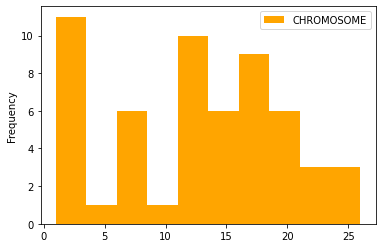

In [ ]:
Agenome.plot(kind="hist",color='orange')

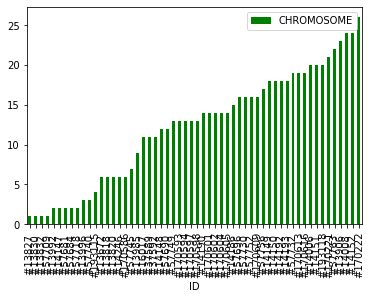

In [ ]:
Agenome.plot(x="ID",kind="bar",color='green')

# Integrantes:
- Espinoza Vela Estéfano André
- Núñez Campos  Hilary Mayte